In [1]:
import pandas as pd
import direction_transition as dit
import paths
from preprocessing import read_csv_clean

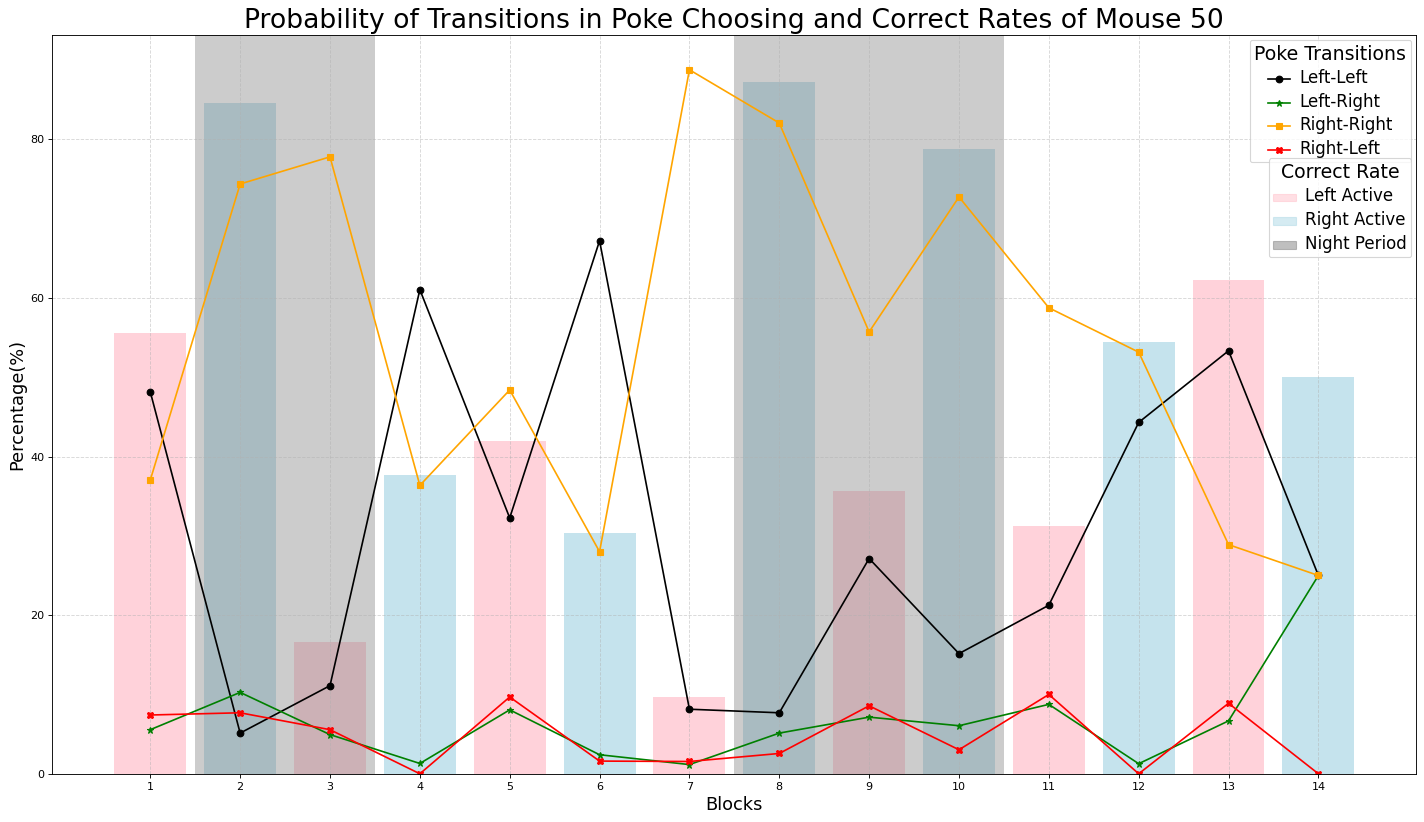

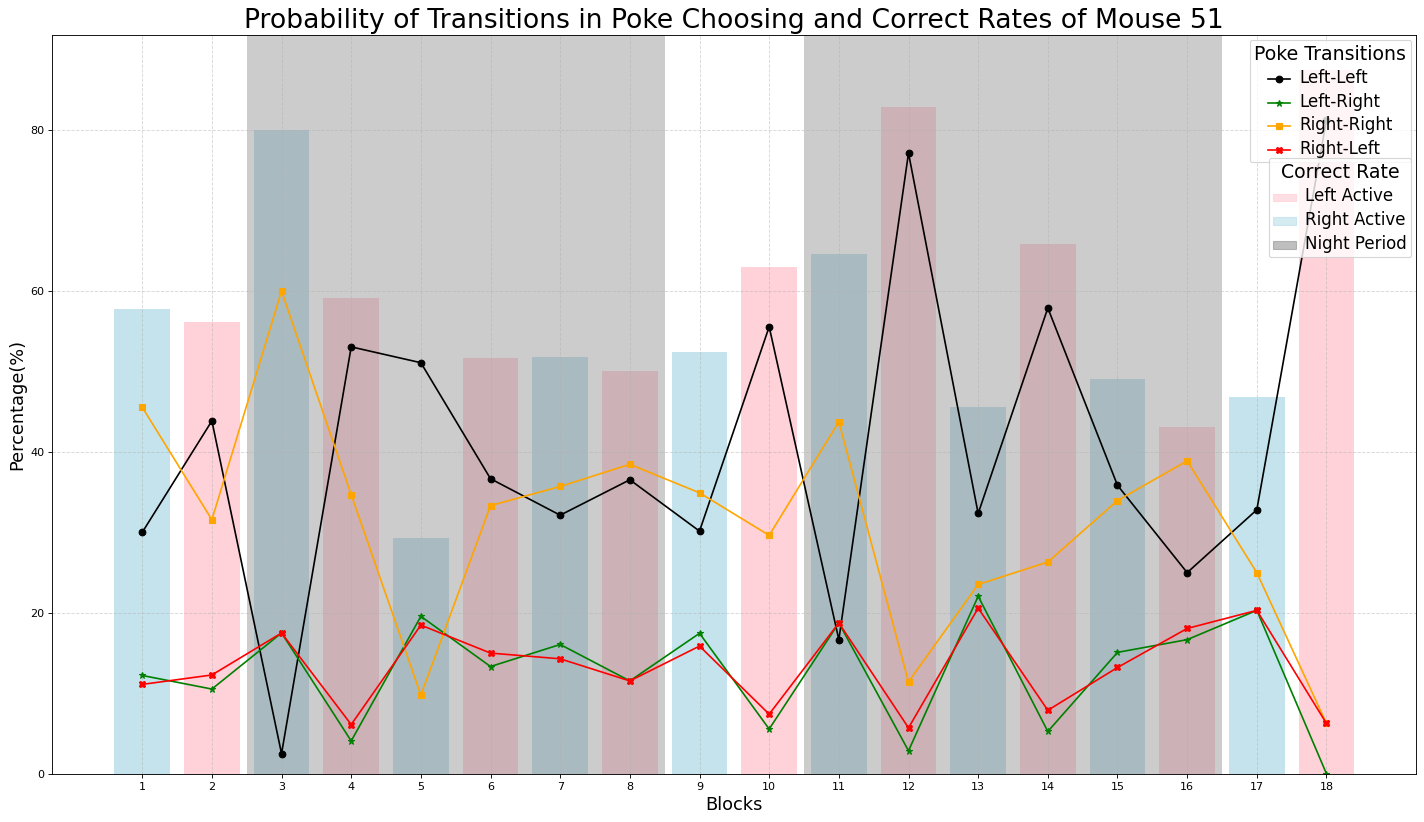

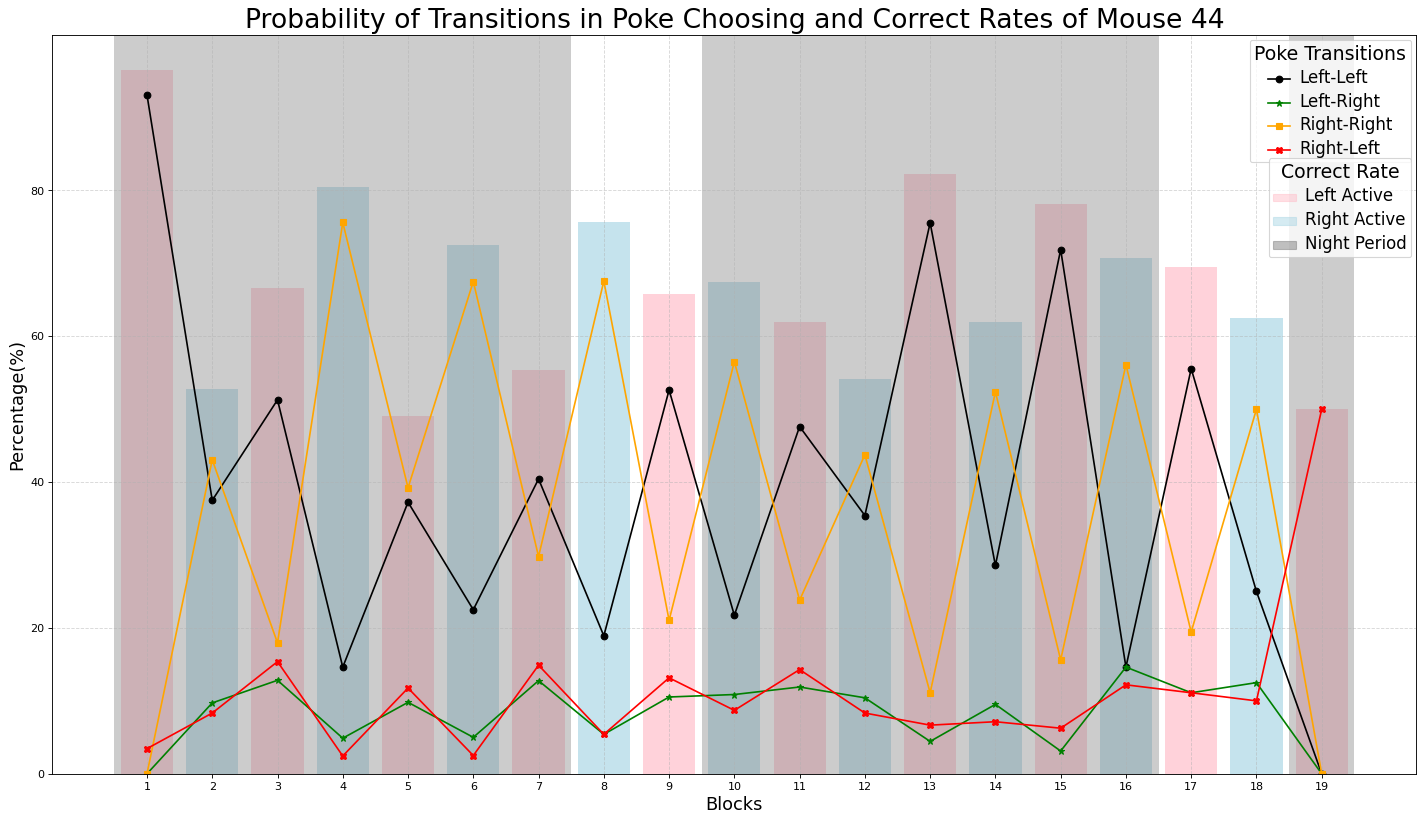

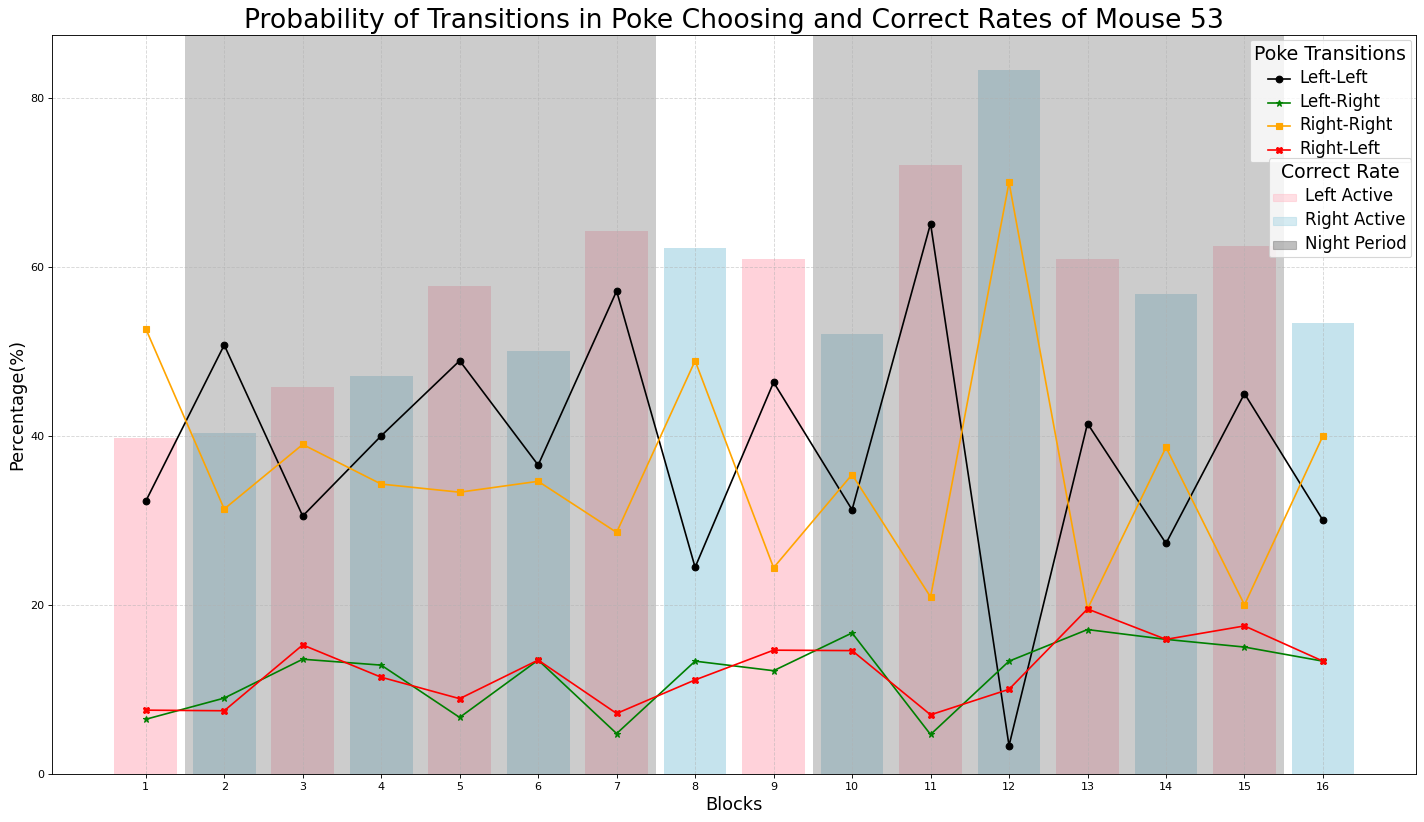

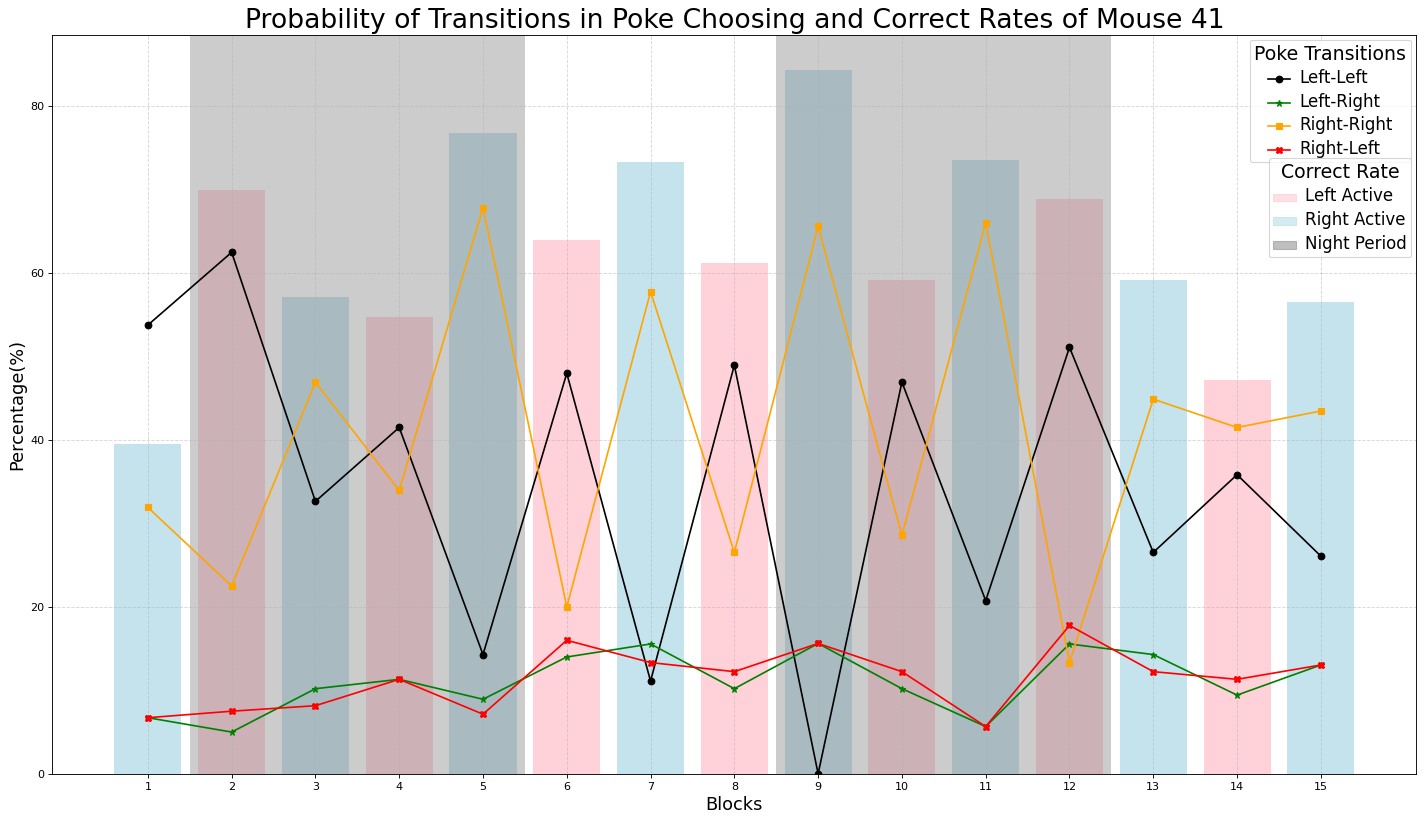

In [2]:
ctrl_scores = []
for path in paths.reversal_ivsa_ctrl:
        data_dropped = read_csv_clean(path, remove_trivial=False)
        blocks = dit.split_data_to_blocks(data_dropped)
        data_stats = dit.get_transition_info(blocks)
        dit.graph_tranition_stats(data_stats, blocks, path)
        diff, left_start = dit.get_difference_key(data_stats)
        ctrl_scores.append(dit.learning_score_grad(diff, left_start))

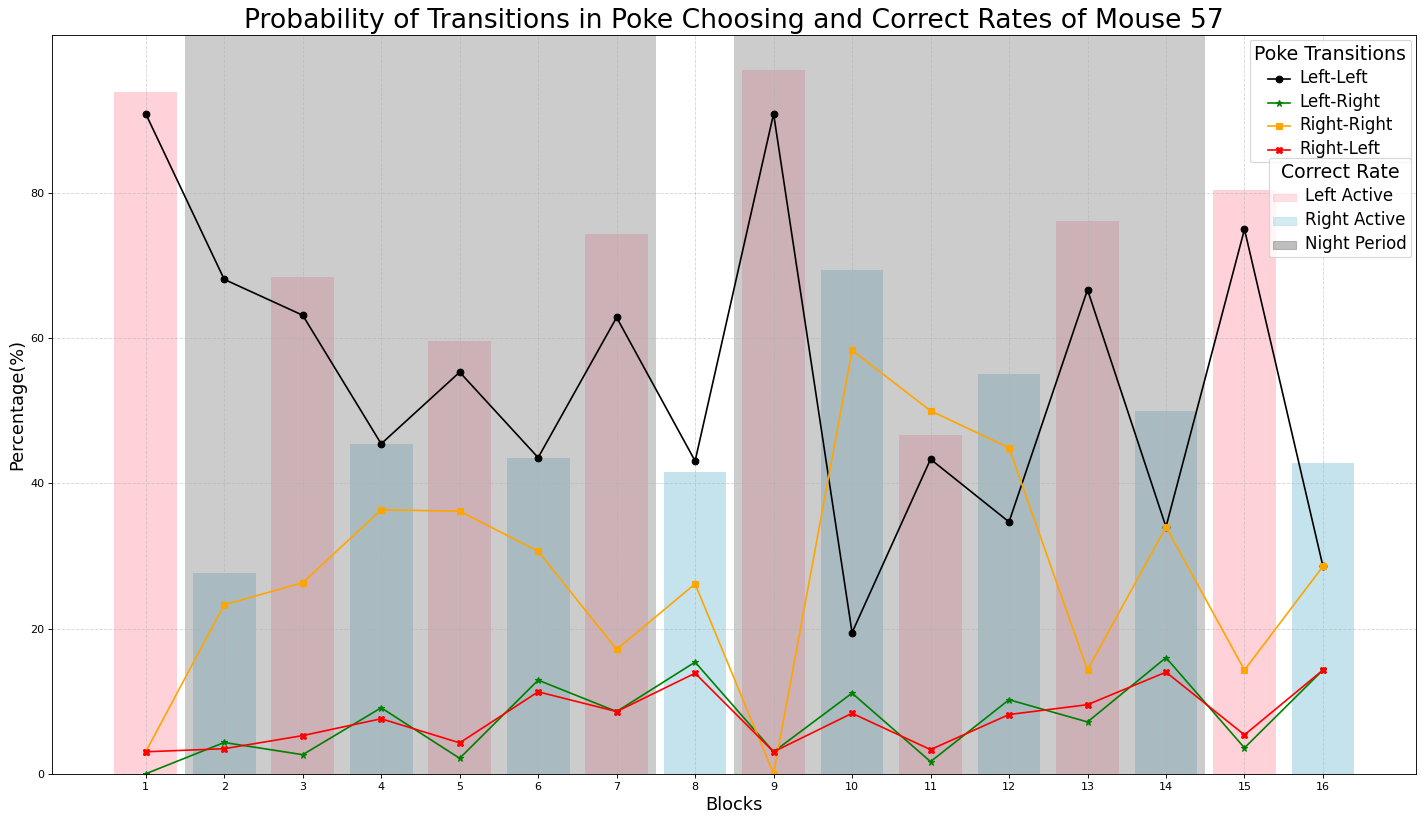

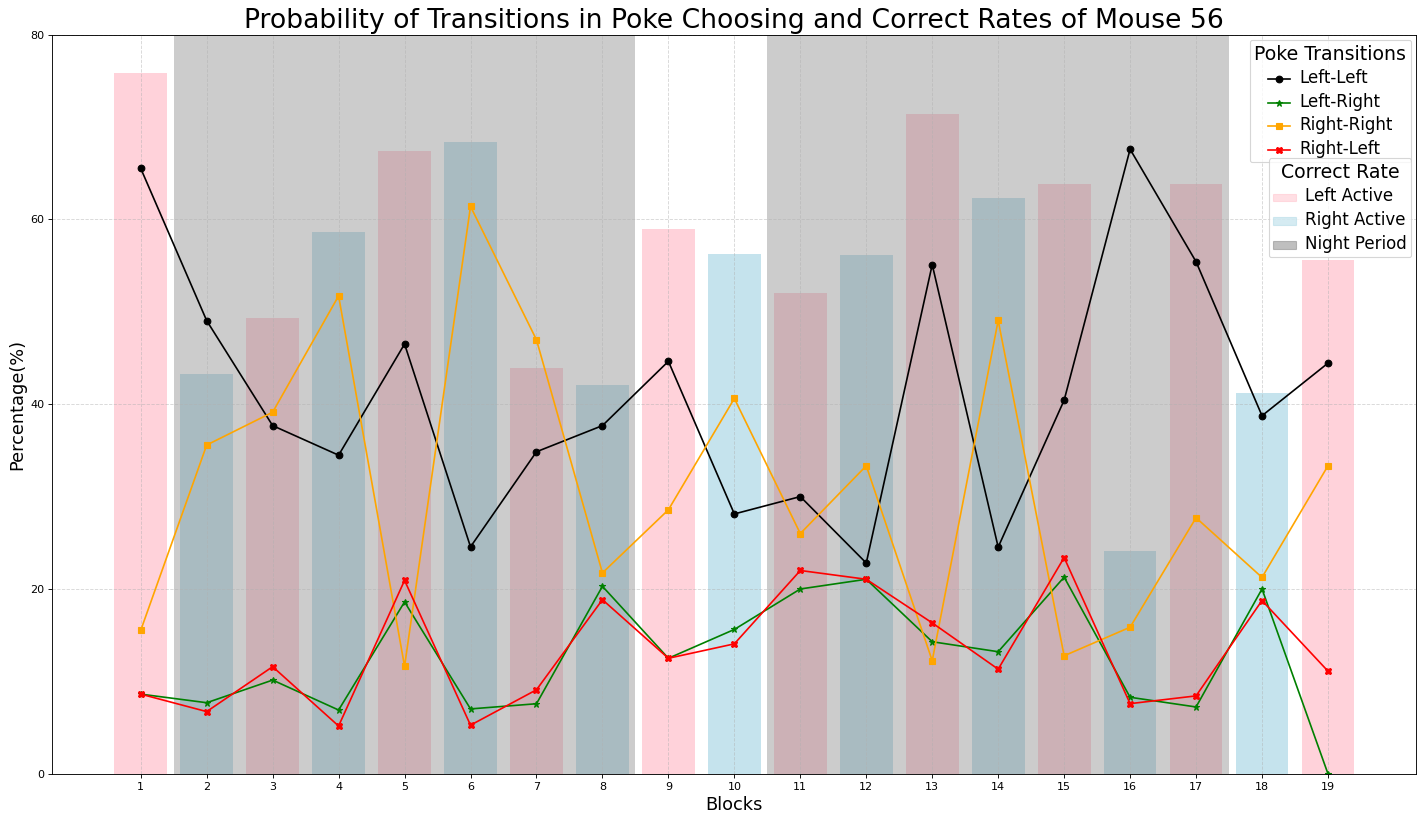

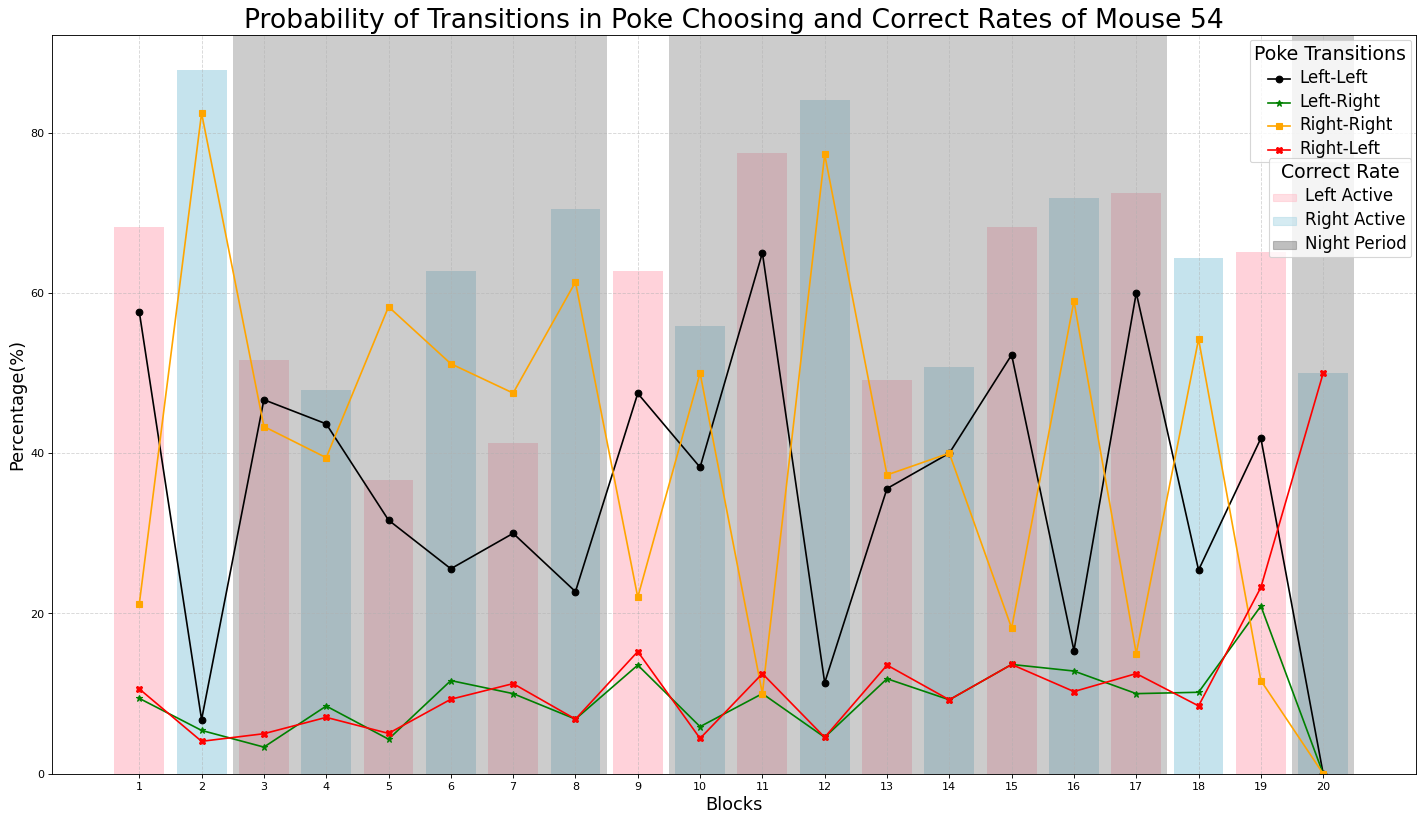

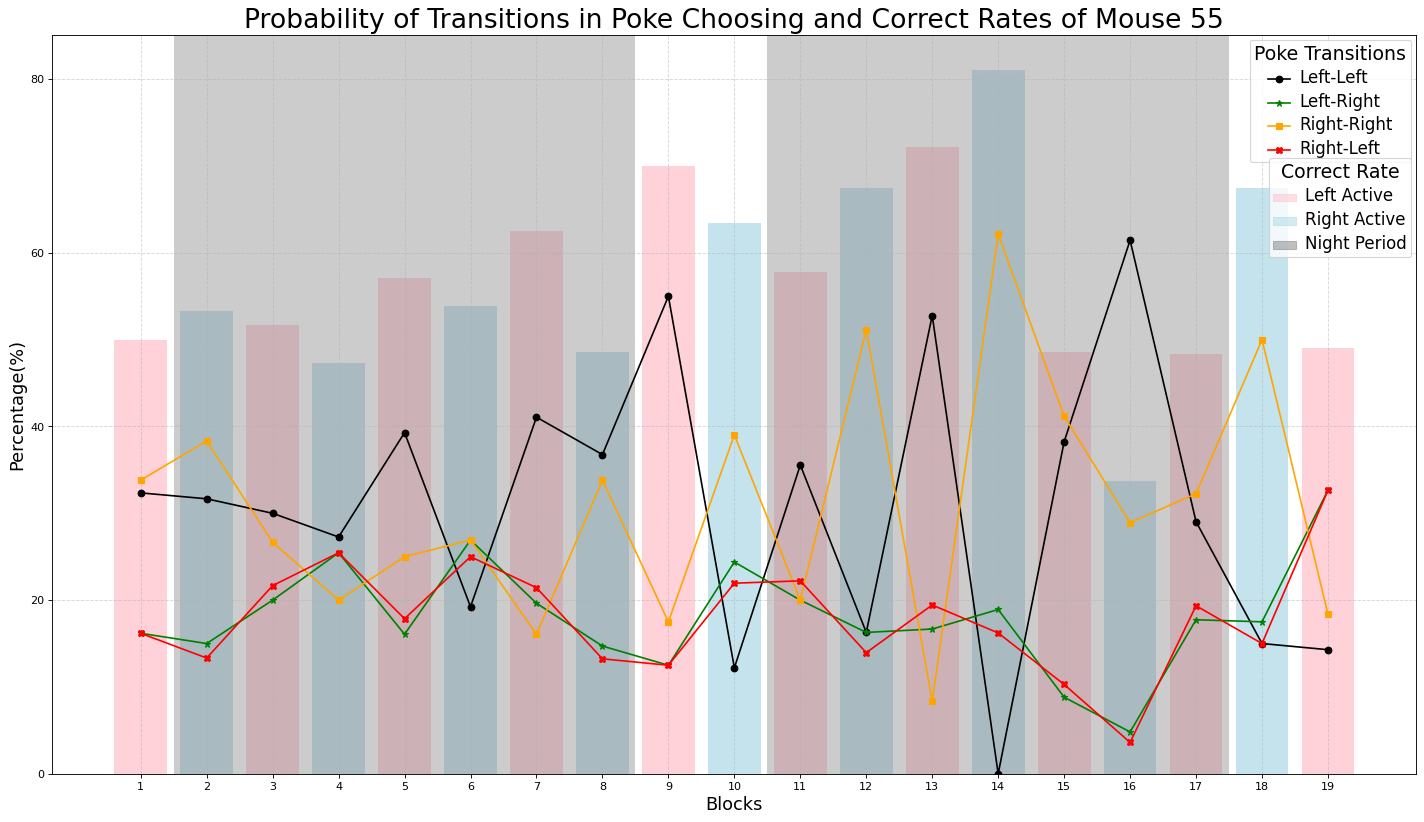

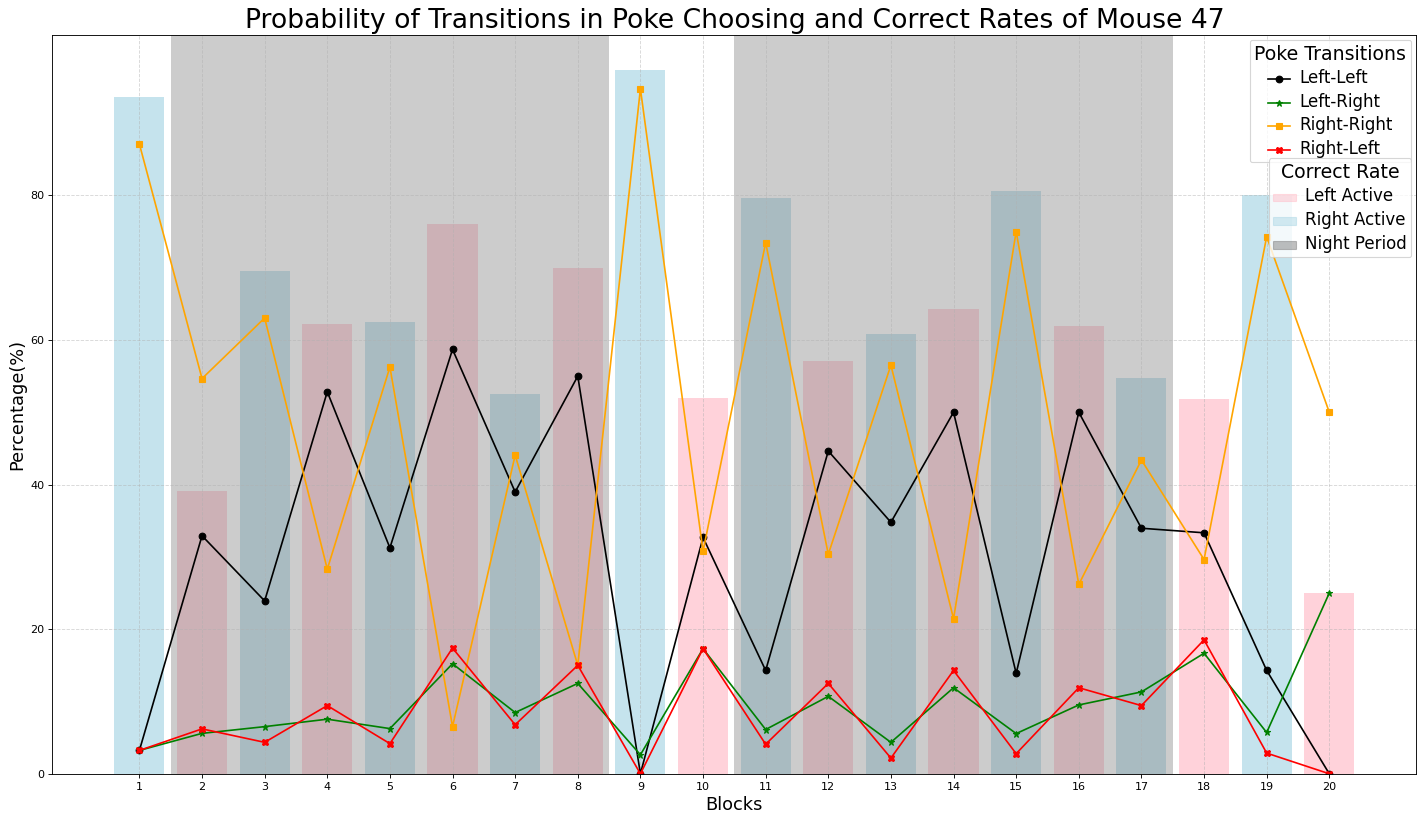

In [3]:
exp_scores = []

for path in paths.reversal_ivsa_exp:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path)
    diff, left_start = dit.get_difference_key(data_stats)
    exp_scores.append(dit.learning_score_grad(diff, left_start))

In [4]:
ctrl_scores, exp_scores

([-106.69, 439.5, 1188.6999999999998, 446.31000000000006, 780.14],
 [616.6800000000001, 346.33, 902.49, 523.31, 1119.23])

In [5]:
import intervals as invs

invs.perform_T_test(ctrl_scores, exp_scores, test_side='two-sided')

P Value is  0.5667707633281212
There is no significant difference between the two groups.
